In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from gen_landscape import *

In [2]:
filename1 = "Experiment_Data\\two_sim_7_deg_2019-11-27 05:23:16.742201.json"
with open(filename1, 'r') as fp:
    total_plot_data = json.load(fp)
filename2 = "Experiment_Data\\two_sim_7_deg_2019-11-27 06:06:04.505457.json"
with open(filename2, 'r') as fp:
    total_plot_data2 = json.load(fp)

for key in total_plot_data2.keys():
    new_key = int(key) + 300
    total_plot_data[new_key] = total_plot_data2[key]
print('done')

done


In [3]:
def calc_win_stats(data_dict):
    sex, asex, draws = 0, 0, 0
    for key in data_dict.keys():
        (chosen_points, who_won) = data_dict[key]
        if who_won==1:
            asex +=1
        elif who_won == 2:
            sex +=1
        elif who_won == 0:
            draws += 1
    print('Current Overall Statistics:')
    print('Sex wins:', sex, ' Asex wins:', asex, ' Draws:', draws)

In [4]:
calc_win_stats(total_plot_data)

Current Overall Statistics:
Sex wins: 395  Asex wins: 185  Draws: 20


In [5]:
asex_win_points = []
sex_win_points = []
draw_points = []
for key in total_plot_data.keys():
    (chosen_points, who_won) = total_plot_data[key]
    if who_won==1:
        asex_win_points.append(chosen_points)
    elif who_won==2:
        sex_win_points.append(chosen_points)
    elif who_won==0:
        draw_points.append(chosen_points)

In [6]:
def get_greater_than_middle(points_list):
    greater_than_middle = []
    for points in points_list:
        greater = len([y for y in points if y<50])
        #equal = [y for y in points if y==50]
        #less = [y for y in points if y==50]
        greater_than_middle.append(greater)
    return greater_than_middle

In [7]:
asex_w_num_greater_than_middle = get_greater_than_middle(asex_win_points)
sex_w_num_greater_than_middle = get_greater_than_middle(sex_win_points)
draw_greater_than_middle = get_greater_than_middle(draw_points)


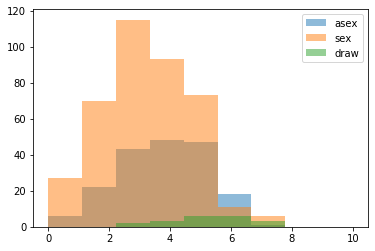

In [8]:
bins = np.linspace(0, 10, 10)
plt.hist(asex_w_num_greater_than_middle,bins, alpha=0.5, label='asex')
plt.hist(sex_w_num_greater_than_middle,bins, alpha=0.5, label='sex')
plt.hist(draw_greater_than_middle,bins, alpha=0.5, label='draw')
plt.legend(loc='upper right')
plt.show()

In [2]:
filtered_asex_win_points = []
for points in asex_win_points:
    if len([y for y in points if y<50])==2:
        filtered_asex_win_points.append(points)

assigned_fitness = filtered_asex_win_points[4]

NameError: name 'asex_win_points' is not defined

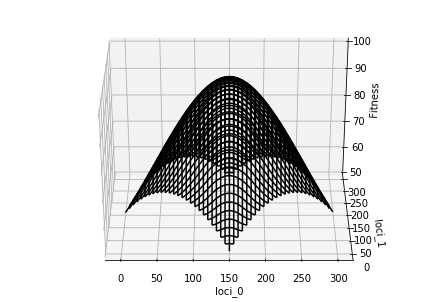

In [3]:
land = Landscape(num_dimensions=2, dimension_size=300, num_grid_res=3, assigned_fitness = [50,50,100,50,50])
land.draw_2d_in_3d(elevation_deg=30, mesh=True)